## GRIP Data Science Internship: TASK 1

### Predict score obtained by a student based on the hours spent studying; using supervised ML

In [1]:
#importing required libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#Handling warnings

import warnings
warnings.filterwarnings("ignore")


### READING AND UNDERSTANDING DATA

In [2]:
#DATASET IS AVAILABLE AS URL. so saving it in a varibale called url

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

#reading the csv file using pd.read_csv and saving the resulting dataframe to 'stud_df'

stud_df = pd.read_csv(url)

#displaying first ten rows

stud_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking dataframe info

stud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#checking no of rows and columns

stud_df.shape

#25 rows and 2 columns

(25, 2)

In [5]:
#checking for statistical desriptions

stud_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for null values in each column

print("No of Null values in each column: ")
print(stud_df.isnull().sum())

#no null values found

No of Null values in each column: 
Hours     0
Scores    0
dtype: int64


### PERFORMING EDA 

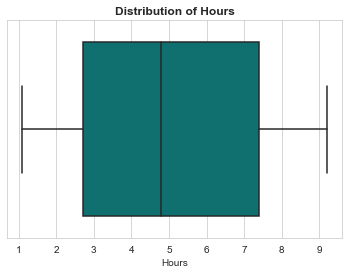

In [7]:
#since both are continous variables, lets check the distribution of both

sns.boxplot(stud_df['Hours'], color='teal')
plt.title("Distribution of Hours", weight = 'bold')
plt.show()

#no outliers found

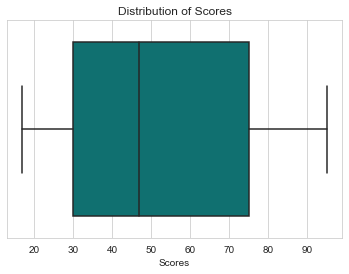

In [8]:
sns.boxplot(stud_df['Scores'], color='teal')
plt.title("Distribution of Scores")
plt.show()

#no outliers found

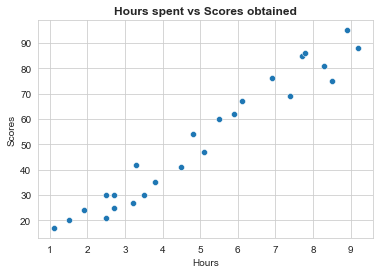

In [9]:
#bivariate analysis of Hours and Scores

sns.scatterplot(x='Hours', y='Scores', data=stud_df)
plt.title("Hours spent vs Scores obtained", weight='bold')
plt.show()

- `from the above graph, it can be infered that both 'Hours' and 'Scores' are linearily related.`

In [10]:
#Importing required libraries for splitting, model building using linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Now, equation for a linear regression would look like:

`y = c + m1 * X1, where`
- y is the target (prediction)
- c i the constsant
- m1 is the coeeficient for the feature X1 (in our case 'Hours')

In [11]:
X = stud_df.drop('Scores', axis = 1) #Hours column
y = stud_df['Scores']


In [12]:
#set seed values in order to generate same split within the dataset

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [13]:
#fitting a line using SKLearn

lm = LinearRegression() #creating an LR object

lm.fit(X_train, y_train)



LinearRegression()

In [14]:
#let us look at the coeeficient and intercept for the model

print("coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)

coefficient:  [9.78856669]
Intercept:  2.370815382341867


### Predicting on test data

In [15]:
#predicting scores on test data based on the model

y_pred = lm.predict(X_test)

In [16]:
#let us compare the actual and predicted scores

model_df = pd.DataFrame({"Actual Score": y_test, "Predicted Score": np.round(y_pred,2)})
model_df

,Actual Score,Predicted Score
5,20,17.05
2,27,33.69
19,69,74.81
16,30,26.84
11,62,60.12
22,35,39.57
17,24,20.97
24,86,78.72


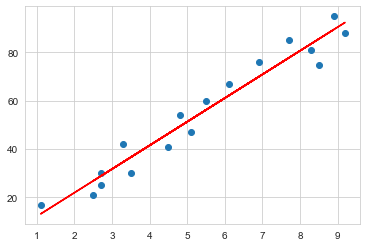

In [17]:
# fitting the line
line = lm.coef_*X_train + lm.intercept_

plt.scatter(X_train, y_train)
plt.plot(X_train, line, 'r');
plt.show()

In [18]:
## MODEL EVALUATION USINF R2 value

#importing library to calculate r2

from sklearn.metrics import r2_score

r2_val = r2_score(y_test, y_pred) #r-squared value of test data

r2_val

#r2 calue is close to 1; which indicates that the relation between the model and dependent variable is strong!

0.9568211104435257

### Checking the model for another value

In [19]:
#let us suppose the hours spent on studying is 9.25 hrs/day.

hrs = [9.25]
result = lm.predict([hrs])

print("Hours: ", hrs)
print("score: ", result[0])

Hours:  [9.25]
score:  92.91505723477056


- `according to the model, if a student studies for 9.25 hrs, he/she would attain a score of 92.92%.`